In [1]:
import mysql.connector as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cnx = sql.connect(user='root', password='', host='127.0.0.1', database='nfl_player_stats')

cursor = cnx.cursor()


In [3]:
player = ("SELECT * FROM players")
stats = ("SELECT * FROM offense_stats")

players_df = pd.read_sql(player, cnx)
stats_df = pd.read_sql(stats, cnx)

players_df = pd.DataFrame(players_df)
stats_df = pd.DataFrame(stats_df)
cnx.close()

In [4]:
#merge tables to one table
players_df['Player_ID'] = players_df['Player_ID'].astype(int)
stats_df['Player_ID'] = stats_df['Player_ID'].astype(int)
player_stats = pd.merge(players_df, stats_df.drop_duplicates(), on=['Player_ID'])
player_stats.reset_index(drop=True)

#get age column
player_stats['age'] = (player_stats['Year']).astype('int64') - player_stats['birth_year']

#drop some columns
stats = player_stats.drop([u'height', u'weight', u'college', u'round_drafted',u'draft_pick',u'draft_year', u'current_salary'], axis=1)

In [5]:
QB = pd.DataFrame(stats[stats['position'] == "QB"])
QB = QB.drop([u'Team',                 u'game_won',
              u'player_team_score',           u'opponent_score',
                       u'passing_rating',
                  u'passing_sacks', u'passing_sacks_yards_lost',
               u'receiving_targets',
           u'receiving_receptions',          u'receiving_yards',
           u'receiving_touchdowns',     u'kick_return_attempts',
              u'kick_return_yards',   u'kick_return_touchdowns',
           u'point_after_attempts',        u'point_after_makes',
            u'field_goal_attempts',         u'field_goal_makes'], axis =1)

RB = pd.DataFrame(stats[stats['position'] == "RB"])
RB = RB.drop([u'Team',                 u'game_won',
              u'player_team_score',           u'opponent_score',
               u'passing_attempts',      u'passing_completions',
                  u'passing_yards',           u'passing_rating',
             u'passing_touchdowns',    u'passing_interceptions',
                  u'passing_sacks', u'passing_sacks_yards_lost',
                u'kick_return_attempts',
              u'kick_return_yards',   u'kick_return_touchdowns',
           u'point_after_attempts',        u'point_after_makes',
            u'field_goal_attempts',         u'field_goal_makes'], axis = 1)
WR = pd.DataFrame(stats[stats['position'] == "WR"])
WR = WR.drop([u'Team',                 u'game_won',
              u'player_team_score',           u'opponent_score',
               u'passing_attempts',      u'passing_completions',
                  u'passing_yards',           u'passing_rating',
             u'passing_touchdowns',    u'passing_interceptions',
                  u'passing_sacks', u'passing_sacks_yards_lost',
         u'kick_return_attempts',
              u'kick_return_yards',   u'kick_return_touchdowns',
           u'point_after_attempts',        u'point_after_makes',
            u'field_goal_attempts',         u'field_goal_makes'], axis = 1)

TE = pd.DataFrame(stats[stats['position'] == "TE"])
TE = TE.drop([u'Team',                 u'game_won',
              u'player_team_score',           u'opponent_score',
               u'passing_attempts',      u'passing_completions',
                  u'passing_yards',           u'passing_rating',
             u'passing_touchdowns',    u'passing_interceptions',
                  u'passing_sacks', u'passing_sacks_yards_lost',
               u'rushing_attempts',            u'rushing_yards',
             u'rushing_touchdowns',      u'kick_return_attempts',
              u'kick_return_yards',   u'kick_return_touchdowns',
           u'point_after_attempts',        u'point_after_makes',
            u'field_goal_attempts',         u'field_goal_makes'], axis = 1)

K = pd.DataFrame(stats[stats['position'] == "K"])
K = K.drop([u'Team',                 u'game_won',
              u'player_team_score',           u'opponent_score',
               u'passing_attempts',      u'passing_completions',
                  u'passing_yards',           u'passing_rating',
             u'passing_touchdowns',    u'passing_interceptions',
                  u'passing_sacks', u'passing_sacks_yards_lost',
               u'rushing_attempts',            u'rushing_yards',
             u'rushing_touchdowns',        u'receiving_targets',
           u'receiving_receptions',          u'receiving_yards',
           u'receiving_touchdowns',     u'kick_return_attempts',
              u'kick_return_yards',   u'kick_return_touchdowns'], axis = 1)

Index([            u'Player_ID',            u'first_name',
                   u'last_name',              u'position',
                  u'birth_year',                  u'Year',
            u'passing_attempts',   u'passing_completions',
               u'passing_yards',    u'passing_touchdowns',
       u'passing_interceptions',      u'rushing_attempts',
               u'rushing_yards',    u'rushing_touchdowns',
                         u'age'],
      dtype='object')


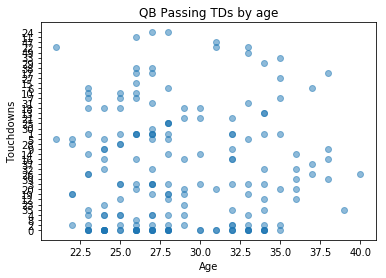

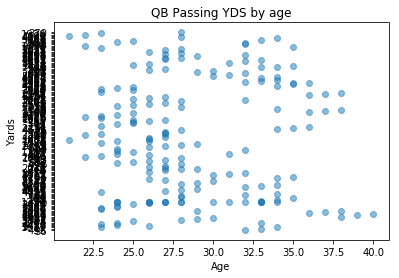

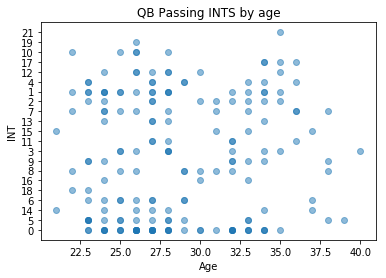

In [6]:
print QB.columns

x = QB['age']
y = QB['passing_touchdowns']

plt.scatter(x,y, alpha=0.5)
plt.title('QB Passing TDs by age')
plt.xlabel('Age')
plt.ylabel('Touchdowns')
plt.show()

x = QB['age']
y = QB['passing_yards']

plt.scatter(x,y, alpha=0.5)
plt.title('QB Passing YDS by age')
plt.xlabel('Age')
plt.ylabel('Yards')
plt.show()

x = QB['age']
y = QB['passing_interceptions']

plt.scatter(x,y, alpha=0.5)
plt.title('QB Passing INTS by age')
plt.xlabel('Age')
plt.ylabel('INT')
plt.show()

Index([           u'Player_ID',           u'first_name',
                  u'last_name',             u'position',
                 u'birth_year',                 u'Year',
           u'rushing_attempts',        u'rushing_yards',
         u'rushing_touchdowns',    u'receiving_targets',
       u'receiving_receptions',      u'receiving_yards',
       u'receiving_touchdowns',                  u'age'],
      dtype='object')


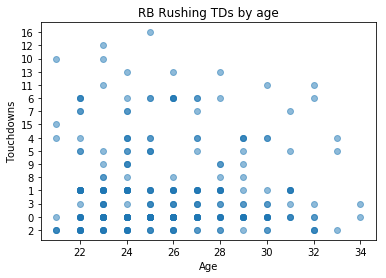

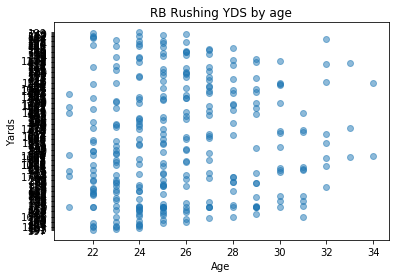

In [7]:
print RB.columns

x = RB['age']
y = RB['rushing_touchdowns']

plt.scatter(x,y, alpha=0.5)
plt.title('RB Rushing TDs by age')
plt.xlabel('Age')
plt.ylabel('Touchdowns')
plt.show()

x = RB['age']
y = RB['rushing_yards']

plt.scatter(x,y, alpha=0.5)
plt.title('RB Rushing YDS by age')
plt.xlabel('Age')
plt.ylabel('Yards')
plt.show()

Index([           u'Player_ID',           u'first_name',
                  u'last_name',             u'position',
                 u'birth_year',                 u'Year',
           u'rushing_attempts',        u'rushing_yards',
         u'rushing_touchdowns',    u'receiving_targets',
       u'receiving_receptions',      u'receiving_yards',
       u'receiving_touchdowns',                  u'age'],
      dtype='object')


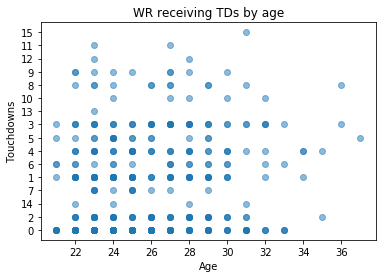

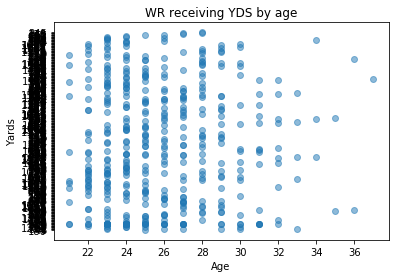

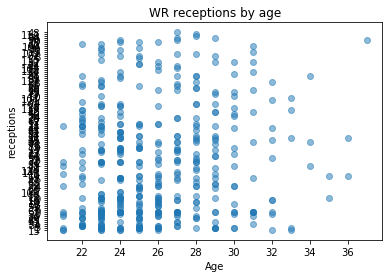

In [8]:
#Wide Recievers
print WR.columns

x = WR['age']
y = WR['receiving_touchdowns']

plt.scatter(x,y, alpha=0.5)
plt.title('WR receiving TDs by age')
plt.xlabel('Age')
plt.ylabel('Touchdowns')
plt.show()

x = WR['age']
y = WR['receiving_yards']

plt.scatter(x,y, alpha=0.5)
plt.title('WR receiving YDS by age')
plt.xlabel('Age')
plt.ylabel('Yards')
plt.show()

x = WR['age']
y = WR['receiving_receptions']

plt.scatter(x,y, alpha=0.5)
plt.title('WR receptions by age')
plt.xlabel('Age')
plt.ylabel('receptions')
plt.show()

Index([           u'Player_ID',           u'first_name',
                  u'last_name',             u'position',
                 u'birth_year',                 u'Year',
          u'receiving_targets', u'receiving_receptions',
            u'receiving_yards', u'receiving_touchdowns',
                        u'age'],
      dtype='object')


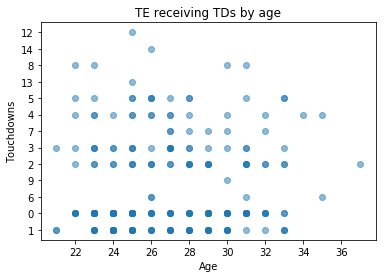

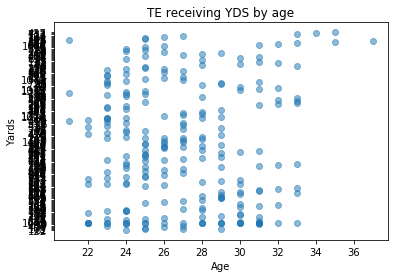

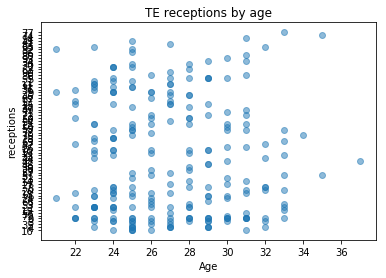

In [9]:
#Tight ENds
print TE.columns

x = TE['age']
y = TE['receiving_touchdowns']

plt.scatter(x,y, alpha=0.5)
plt.title('TE receiving TDs by age')
plt.xlabel('Age')
plt.ylabel('Touchdowns')
plt.show()

x = TE['age']
y = TE['receiving_yards']

plt.scatter(x,y, alpha=0.5)
plt.title('TE receiving YDS by age')
plt.xlabel('Age')
plt.ylabel('Yards')
plt.show()

x = TE['age']
y = TE['receiving_receptions']

plt.scatter(x,y, alpha=0.5)
plt.title('TE receptions by age')
plt.xlabel('Age')
plt.ylabel('receptions')
plt.show()

Index([           u'Player_ID',           u'first_name',
                  u'last_name',             u'position',
                 u'birth_year',                 u'Year',
       u'point_after_attempts',    u'point_after_makes',
        u'field_goal_attempts',     u'field_goal_makes',
                        u'age'],
      dtype='object')


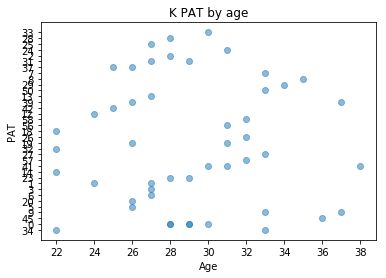

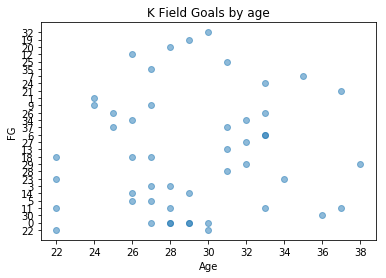

In [10]:
#Kickers
print K.columns

x = K['age']
y = K['point_after_makes']

plt.scatter(x,y, alpha=0.5)
plt.title('K PAT by age')
plt.xlabel('Age')
plt.ylabel('PAT')
plt.show()

x = K['age']
y = K['field_goal_makes']

plt.scatter(x,y, alpha=0.5)
plt.title('K Field Goals by age')
plt.xlabel('Age')
plt.ylabel('FG')
plt.show()


In [11]:
TE

,Player_ID,first_name,last_name,position,birth_year,Year,receiving_targets,receiving_receptions,receiving_yards,receiving_touchdowns,age
9,71,Jerell,Adams,TE,1992,2016,21,16,122,1,24
10,71,Jerell,Adams,TE,1992,2017,4,4,61,0,25
21,289,Dwayne,Allen,TE,1990,2015,29,16,109,1,25
22,289,Dwayne,Allen,TE,1990,2016,52,35,406,6,26
23,289,Dwayne,Allen,TE,1990,2017,12,4,37,1,27
30,373,Jace,Amaro,TE,1992,2016,4,3,59,0,24
43,816,Kennard,Backman,TE,1993,2015,0,0,0,0,22
49,1142,Gary,Barnidge,TE,1985,2015,125,79,1043,9,30
50,1142,Gary,Barnidge,TE,1985,2016,82,55,612,2,31
55,1440,Blake,Bell,TE,1991,2015,25,15,186,0,24
